# Expected goal probabily of shots in NHL

The goal is to obtain a measure of the expected goal probability based on data about a given shot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read in CSV data

Data obtained from moneypuck.com

The data already contains the authors own result of an expected goal model 

In [2]:
df_shots = pd.read_csv('../../data/shots_2007-2016.csv')

In [3]:
df_shots.head()

,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,arenaAdjustedXCordOnIce,isHomeTeam,shotWasOnGoal,xGoal,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal
0,0,L.A,ANA,2007,0,20001,1,4,17,8,...,-68.0,1,1,0.061818,0.121819,0.050838,0.446188,0.298706,0.020630,0.713983
1,1,L.A,ANA,2007,0,20001,1,6,52,22,...,38.0,0,0,0.013928,0.192039,0.039734,0.440897,0.293636,0.019766,0.652187
2,2,L.A,ANA,2007,0,20001,1,8,86,20,...,67.0,0,1,0.029313,0.109528,0.043757,0.467555,0.334535,0.015313,0.632221
3,3,L.A,ANA,2007,0,20001,1,13,188,0,...,-64.0,1,1,0.028618,0.179013,0.032494,0.356352,0.384244,0.019279,0.742654
4,4,L.A,ANA,2007,0,20001,1,17,242,3,...,54.0,0,1,0.004015,0.204370,0.044636,0.497285,0.229197,0.020498,0.749917


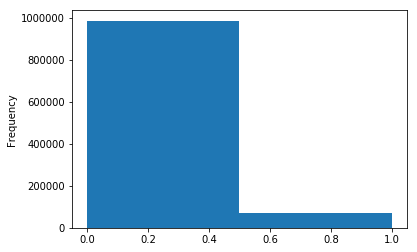

In [4]:
df_shots['goal'].plot.hist(bins=2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1091810f0>,
      dtype=object)

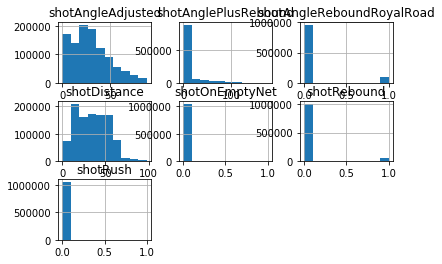

In [62]:
colsOfInterest = ["shotType", "shotOnEmptyNet", "shotRush", "shotRebound",
                  "shotDistance", "shotAngleAdjusted", 'shotAnglePlusRebound', 'shotAngleReboundRoyalRoad']
df_red = df_shots[colsOfInterest]
df_red.hist()

In [59]:
print("EMPTY NET SHOTS")
print(df_shots['shotOnEmptyNet'].value_counts())
print()
print("RUSH SHOTS")
print(df_shots['shotRush'].value_counts())
print()
print("REBOUND SHOTS")
print(df_shots['shotRebound'].value_counts())

EMPTY NET SHOTS
0    1049845
1       4282
Name: shotOnEmptyNet, dtype: int64

RUSH SHOTS
0    1051983
1       2144
Name: shotRush, dtype: int64

REBOUND SHOTS
0    1000571
1      53556
Name: shotRebound, dtype: int64


In [63]:
shotPredictors = ["shotType", "shotOnEmptyNet", "shotRush", "shotRebound",
                  "shotDistance", "shotAngleAdjusted"]

In [64]:
y = df_shots.loc[:,'goal']
X = df_shots[shotPredictors]

In [65]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: goal, dtype: int64

In [66]:
pd.options.mode.chained_assignment = None
X['shotType'] = X.shotType.astype('category')

In [68]:
print(X['shotType'].unique())
print()
print(X.shotType.value_counts())

[WRIST, BACK, SLAP, TIP, SNAP, WRAP, DEFL, NaN]
Categories (7, object): [WRIST, BACK, SLAP, TIP, SNAP, WRAP, DEFL]

WRIST    490080
SLAP     241426
SNAP     149731
BACK      80364
TIP       61454
DEFL      19657
WRAP      11344
Name: shotType, dtype: int64


In [69]:
shotTypeLabels = dict( enumerate(X['shotType'].cat.categories) )
print(shotTypeLabels)

{0: 'BACK', 1: 'DEFL', 2: 'SLAP', 3: 'SNAP', 4: 'TIP', 5: 'WRAP', 6: 'WRIST'}


In [70]:
shotTypeLabelsBack = {v: k for k, v in shotTypeLabels.items()}
print(shotTypeLabelsBack)

{'BACK': 0, 'DEFL': 1, 'SLAP': 2, 'SNAP': 3, 'TIP': 4, 'WRAP': 5, 'WRIST': 6}


In [71]:
X["shotTypeCode"] = X["shotType"].cat.codes

In [35]:
X.dtypes

shotType             category
shotOnEmptyNet          int64
shotRebound             int64
shotDistance          float64
shotAngleAdjusted     float64
shotTypeCode             int8
dtype: object

In [72]:
shotPredictors = ["shotTypeCode", "shotOnEmptyNet", "shotRush", "shotRebound",
                  "shotDistance", "shotAngleAdjusted"]
X_final = X[shotPredictors]

In [73]:
X_final.dtypes

shotTypeCode            int8
shotOnEmptyNet         int64
shotRush               int64
shotRebound            int64
shotDistance         float64
shotAngleAdjusted    float64
dtype: object

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(737888, 6)
(316239, 6)


In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [76]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on training set: 0.94


In [44]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [92]:
X_test.iloc[[0]]

,shotTypeCode,shotOnEmptyNet,shotRush,shotRebound,shotDistance,shotAngleAdjusted
870486,3,0,0,0,7.071068,45.0


In [129]:
data = {'shotTypeCode': 3, 'shotOnEmptyNet': 0, 'shotRebound':0,
            'shotRush': 0, 'shotDistance': 7.071068, 'shotAngleAdjusted':45.0}

In [132]:
df_test = pd.DataFrame.from_records([data])
df_test = df_test[["shotTypeCode", "shotOnEmptyNet", "shotRush", "shotRebound",
                  "shotDistance", "shotAngleAdjusted"]]
# df_test = pd.Series(data).to_frame()
df_test

,shotTypeCode,shotOnEmptyNet,shotRush,shotRebound,shotDistance,shotAngleAdjusted
0,3,0,0,0,7.071068,45.0


In [133]:
logreg.predict_proba(df_test)

array([[0.89072991, 0.10927009]])

In [131]:
logreg.classes_

array([0, 1])

In [110]:
y_pred_proba = logreg.predict_proba(X_test.iloc[[0]])
y_pred_proba

array([[0.89072991, 0.10927009]])

In [22]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.935


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[295749    272]
 [ 19666    552]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97    296021
          1       0.67      0.03      0.05     20218

avg / total       0.92      0.94      0.91    316239



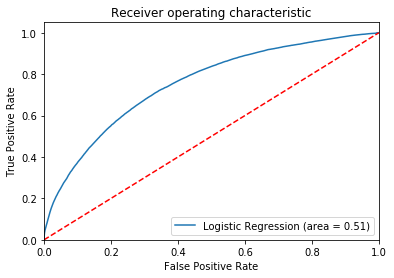

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Save the data for our deployment script

We need to save the model to disk for deployment

In [134]:
modelMetrics = {'roc_auc_score': logit_roc_auc, 'valid_acc': results.mean() }
from sklearn.externals import joblib
joblib.dump(logreg, './objects/log_reg_model.pkl') 
joblib.dump(shotTypeLabelsBack, './objects/shot_labels.pkl')
joblib.dump(modelMetrics, './objects/model_metrics.pkl')

['./objects/model_metrics.pkl']